In [36]:
import os
current_path = os.getcwd()
import numpy as np
from numpy import seterr
seterr(all='raise')
import matplotlib.pyplot as plt
import math
import random
from tqdm import tqdm
import sys
sys.path.append(current_path)
sys.path.append(current_path+'/../../')
import myInput
import PACKAGE_MP_Linear as linear2d
import post_processing
import PACKAGE_MP_3DLinear as Linear_3D
import PACKAGE_MP_3DVertex as Vertex_3D
sys.path.append(current_path+'/../calculate_tangent/')

import importlib
importlib.reload(post_processing)
importlib.reload(Linear_3D)
importlib.reload(linear2d)


<module 'PACKAGE_MP_Linear' from '/home/lin.yang/projects/VECTOR/examples/GB_velocity/../../PACKAGE_MP_Linear.py'>

In [3]:
if __name__ == '__main__':
    # File name
    data_file_folder = "/blue/michael.tonks/lin.yang/VECTOR_data/"
    npy_file_folder = "/blue/michael.tonks/lin.yang/SPPARKS-VirtualIncEnergy/3d_poly_fully/results/"
    case_name = "264_5k"
    npy_file_name_aniso = f"p_ori_fully5d_fz_aveE_f1.0_t1.0_{case_name}_multiCore64_J1_refer_1_0_0_seed56689_kt1.95.npy"
    
    # Initial data
    npy_file_aniso = np.load(npy_file_folder + npy_file_name_aniso)
    npy_file_aniso = npy_file_aniso.astype(int)
    print(f"The {case_name} data size is: {npy_file_aniso.shape}")
    print("READING DATA DONE")
    step_num, size_x, size_y, size_z = npy_file_aniso.shape

The 264_5k data size is: (51, 264, 264, 264)
READING DATA DONE


In [3]:
#     # remove the small noisy GBs (ignore the noise on domain boundary)
    
#     filter_width_half = 2
#     npy_file_aniso_filter = npy_file_aniso.copy()
#     break_point=0
#     for i in tqdm(range(1,step_num)):
#         if break_point == 1: break
#         current_microstructure = npy_file_aniso[i]
#         updates_num = 0
#         for x_index in (range(filter_width_half, size_x-filter_width_half,2*filter_width_half-1)):
#             if break_point == 1: break
#             for y_index in range(filter_width_half, size_y-filter_width_half,2*filter_width_half-1):
#                 if break_point == 1: break
#                 for z_index in range(filter_width_half, size_z-filter_width_half,2*filter_width_half-1):
#                     if break_point == 1: break
#                     filter_window = current_microstructure[x_index-filter_width_half:x_index+filter_width_half+1, 
#                                                            y_index-filter_width_half:y_index+filter_width_half+1,
#                                                            z_index-filter_width_half:z_index+filter_width_half+1]
#                     filter_window_inner = current_microstructure[x_index-filter_width_half+1:x_index+filter_width_half,
#                                                                  y_index-filter_width_half+1:y_index+filter_width_half,
#                                                                  z_index-filter_width_half+1:z_index+filter_width_half]
#                     grain_id_inner_list = np.unique(filter_window_inner)
#                     grain_id_list = np.unique(filter_window)
#                     # print(f"{len(grain_id_list)},{len(grain_id_inner_list)}")
#                     if len(grain_id_list) < 2 or len(grain_id_inner_list) < 2: continue
#                     grain_id_num = np.zeros(len(grain_id_list))
#                     grain_id_inner_num = np.zeros(len(grain_id_list))
#                     for m in range(len(grain_id_list)):
#                         grain_id_num[m] = np.sum(filter_window==grain_id_list[m])
#                         grain_id_inner_num[m] = np.sum(filter_window_inner==grain_id_list[m])
#                     # update the cluster only in inner window with largest grain cluster id (!! may have issue)
#                     main_id = grain_id_list[int(np.argmax(grain_id_num))]
#                     filter_window_after = filter_window.copy()
#                     old_updates_num = updates_num
#                     for m in range(len(grain_id_list)):
#                         if grain_id_num[m] == grain_id_inner_num[m]: 
#                             filter_window_after[filter_window == grain_id_list[m]] = main_id
#                             updates_num += 1
                    
#                     # return the updated data back
#                     if updates_num > old_updates_num:
#                         npy_file_aniso_filter[i, x_index-filter_width_half:x_index+filter_width_half+1, 
#                                                y_index-filter_width_half:y_index+filter_width_half+1,
#                                                z_index-filter_width_half:z_index+filter_width_half+1] = filter_window_after
#                     # if updates_num > old_updates_num:
#                     #     # print(filter_window)
#                     #     # print(filter_window_after)
#                     #     print("===============")
#                     #     print(npy_file_aniso[i, x_index-filter_width_half:x_index+filter_width_half+1, 
#                     #                          y_index-filter_width_half:y_index+filter_width_half+1,
#                     #                          z_index-filter_width_half:z_index+filter_width_half+1])
#                     #     print(npy_file_aniso_filter[i, x_index-filter_width_half:x_index+filter_width_half+1, 
#                     #                          y_index-filter_width_half:y_index+filter_width_half+1,
#                     #                          z_index-filter_width_half:z_index+filter_width_half+1])
#                     #     # break_point =1
#         # keep updated current microstructure into filter matrix
#         print(f"The updates in current step is {updates_num}")
#         break
#     # np.save(f"data/3D_microstructure_{case_name}", npy_file_aniso_filter)

In [4]:

# plt.figure(figsize=(13,13))
# plt.imshow(npy_file_aniso_filter[1][2])
# plt.colorbar()

# plt.figure(figsize=(13,13))
# plt.imshow(npy_file_aniso[1][2])
# plt.colorbar()

# print(np.sum(npy_file_aniso_filter[1]!=npy_file_aniso[1]))

# cores = 128
# loop_times = 5
# R = np.zeros((size_x,size_y,size_z,4))
# smoothing_class = Linear_3D.linear3d_class(size_x,size_y,size_z,grain_nums,cores,loop_times,npy_file_aniso_filter[1],R,'p')
# smoothing_class.linear3d_main("curvature")
# C_ln = smoothing_class.get_C()
# curvature_matrix = C_ln[1,:]
# print("curvature matrix done!")


In [5]:
    # YOU should remove the very small GB due to the less impact on curvature study
    # YOU should use different accuracy algorithm on voxels around the TJs.
    # A potential error: some small spherical GB are generated around large GB with same GB id
    
    
    # step_num=2
    grain_nums = 5000
    GB_infomation_dict_list = []
    curvature_matrix_list = []
    for time_step in tqdm(range(step_num)):
        data_file_name = f"GB_velocity_data/curvature_velocity_data_{case_name}_step{time_step}.npz"
        data_curvature_file_name = f"GB_velocity_data/matrix_curvature_data_{case_name}_step{time_step}.npz"
        if os.path.exists(data_file_folder + data_file_name):
            npz_file = np.load(data_file_folder + data_file_name,allow_pickle=True)
            GB_infomation_dict = npz_file["GB_infomation_dict"]
            GB_infomation_dict_list.append(GB_infomation_dict.item())
        else:
            current_microstructure = npy_file_aniso[time_step]
            # get curvature
            if os.path.exists(data_file_folder + data_curvature_file_name):
                npz_file_curvature = np.load(data_file_folder + data_curvature_file_name)
                curvature_matrix = npz_file_curvature["curvature_matrix"]
                curvature_matrix_list.append(curvature_matrix)
            else:
                cores = 128
                loop_times = 5
                R = np.zeros((size_x,size_y,size_z,4))
                smoothing_class = Linear_3D.linear3d_class(size_x,size_y,size_z,grain_nums,cores,loop_times,current_microstructure,R,'p')
                smoothing_class.linear3d_main("curvature")
                C_ln = smoothing_class.get_C()
                curvature_matrix = C_ln[1,:]
                curvature_matrix_list.append(curvature_matrix)
                # save curvature information
                np.savez(data_file_folder + data_curvature_file_name, curvature_matrix=curvature_matrix)
            print("Finish curvature calculation")
            
            # Get TJ and QJ information first
            TJ_infomation_dict = dict()
            for index, result in np.ndenumerate(current_microstructure):
                i,j,k = index
                ip,im,jp,jm,kp,km = myInput.periodic_bc3d(size_x,size_y,size_z,i,j,k)
                if ( ((current_microstructure[ip,j,k]-current_microstructure[i,j,k])!=0) or ((current_microstructure[im,j,k]-current_microstructure[i,j,k])!=0) or\
                     ((current_microstructure[i,jp,k]-current_microstructure[i,j,k])!=0) or ((current_microstructure[i,jm,k]-current_microstructure[i,j,k])!=0) or\
                     ((current_microstructure[i,j,kp]-current_microstructure[i,j,k])!=0) or ((current_microstructure[i,j,km]-current_microstructure[i,j,k])!=0) ):
                    central_site = int(current_microstructure[i,j,k])
                    neighboring_sites_list = np.array([current_microstructure[ip,j,k], current_microstructure[i,jp,k], current_microstructure[i,j,kp], current_microstructure[im,j,k], current_microstructure[i,jm,k], current_microstructure[i,j,km]]).astype(int)
                    neighboring_sites_set = set(neighboring_sites_list) # Get all unique neighboring sites
                    if central_site in neighboring_sites_set: neighboring_sites_set.remove(central_site) # remove central site
                    neighboring_sites_list_unque = list(neighboring_sites_set)
                    # remove the TJs and QJs
                    if len(neighboring_sites_list_unque) > 1: 
                        for m in range(len(neighboring_sites_list_unque)):
                            pair_id = post_processing.get_line(central_site, neighboring_sites_list_unque[m]) # get pair id
                            if pair_id in TJ_infomation_dict:
                                tmp = TJ_infomation_dict[pair_id]
                                tmp.append([i,j,k])
                                TJ_infomation_dict[pair_id] = tmp
                            else: 
                                TJ_infomation_dict[pair_id] = [[i,j,k]]
            print("Finish TJ extraction")
            
            # Get the center of each GB
            GB_infomation_dict = dict()
            TJ_distance_max = 6 # voxels
            for index, result in np.ndenumerate(current_microstructure):
                i,j,k = index
                ip,im,jp,jm,kp,km = myInput.periodic_bc3d(size_x,size_y,size_z,i,j,k)
                if ( ((current_microstructure[ip,j,k]-current_microstructure[i,j,k])!=0) or ((current_microstructure[im,j,k]-current_microstructure[i,j,k])!=0) or\
                     ((current_microstructure[i,jp,k]-current_microstructure[i,j,k])!=0) or ((current_microstructure[i,jm,k]-current_microstructure[i,j,k])!=0) or\
                     ((current_microstructure[i,j,kp]-current_microstructure[i,j,k])!=0) or ((current_microstructure[i,j,km]-current_microstructure[i,j,k])!=0) ):
                    central_site = int(current_microstructure[i,j,k])
                    neighboring_sites_list = np.array([current_microstructure[ip,j,k], current_microstructure[i,jp,k], current_microstructure[i,j,kp], current_microstructure[im,j,k], current_microstructure[i,jm,k], current_microstructure[i,j,km]]).astype(int)
                    neighboring_sites_set = set(neighboring_sites_list) # Get all unique neighboring sites
                    if central_site in neighboring_sites_set: neighboring_sites_set.remove(central_site) # remove central site
                    neighboring_sites_list_unque = list(neighboring_sites_set)
                    # remove the TJs and QJs
                    if len(neighboring_sites_list_unque) > 1: continue # only remove TJs and QJs
                    # CONTINUE...    # remove the voxels around TJs and QJs
                    # check the GB voxels is close to TJ or not
                    break_point = 0
                    pair_id = post_processing.get_line(central_site, neighboring_sites_list_unque[0]) # get pair id
                    if central_site<neighboring_sites_list_unque[0]: pair_id_pair = [central_site, neighboring_sites_list_unque[0]]
                    else: pair_id_pair = [neighboring_sites_list_unque[0], central_site]
                    if pair_id in GB_infomation_dict:
                        GB_infomation_dict[pair_id][5] += 1 # GB area
                    else:
                        GB_infomation = np.array([0,0,0,0,0.0,1,pair_id_pair[0],pair_id_pair[1]]) # GBnum-curvature,i,j,k,curvature,GBnum,gid0,gid1
                        GB_infomation_dict[pair_id] = GB_infomation
                    if pair_id in TJ_infomation_dict:
                        for TJ_site in TJ_infomation_dict[pair_id]:
                            TJ_distance = np.linalg.norm(index-np.array(TJ_site))
                            if TJ_distance < TJ_distance_max: 
                                break_point = 1
                                break
                    if break_point == 1: continue
                    # calculate or extract misorientation
                    # if pair_id in GB_infomation_dict:
                    GB_infomation_dict[pair_id][0] += 1
                    GB_infomation_dict[pair_id][1:5] += np.array([i,j,k,curvature_matrix[i,j,k]])
                    # else:
                    #     GB_infomation = np.array([1,i,j,k,curvature_matrix[i,j,k]])
                    #     GB_infomation_dict[pair_id] = GB_infomation
            # get the correct location for each GB
            small_GB_list = []
            for key in GB_infomation_dict: 
                if GB_infomation_dict[key][0] == 0: 
                    small_GB_list.append(key) # remove the small GB with 0 voxels after remove voxels close to TJs
            for s_index in range(len(small_GB_list)): GB_infomation_dict.pop(small_GB_list[s_index])
            for key in GB_infomation_dict: 
                GB_infomation_dict[key][1:5]=GB_infomation_dict[key][1:5]/GB_infomation_dict[key][0]
            print(f"Current GBs len at {time_step} steps: {len(GB_infomation_dict)}")
            # save information
            np.savez(data_file_folder + data_file_name, GB_infomation_dict=GB_infomation_dict)
            GB_infomation_dict_list.append(GB_infomation_dict)
            
        
    

            
            
            
            
            

100%|██████████| 51/51 [00:00<00:00, 178.71it/s]


In [6]:
    
    
    time_interval = 2
    GB_list_velocity = np.zeros((step_num,int(grain_nums*(grain_nums+1)/2)))
    GB_list_velocity_list = []
    GB_list_curvature_list = []
    for time_step in range(step_num):
        if time_step+1 >= step_num: continue
        GB_list_velocity_list_tmp = []
        GB_list_curvature_list_tmp = []
        for key in tqdm(GB_infomation_dict_list[time_step]):
            if GB_infomation_dict_list[time_step+1].get(key) is None: continue
            # Calculate velocity
            pair_id_pair = GB_infomation_dict_list[time_step][key][6:8]
            growth_direction1 = (npy_file_aniso[time_step]==pair_id_pair[0])*(npy_file_aniso[time_step+1]==pair_id_pair[1])
            growth_direction2 = (npy_file_aniso[time_step]==pair_id_pair[1])*(npy_file_aniso[time_step+1]==pair_id_pair[0])
            dV = abs(np.sum(growth_direction1)-np.sum(growth_direction2))
            
            # location_difference = GB_infomation_dict_list[time_step+1][key][1:4] - GB_infomation_dict_list[time_step][key][1:4]
            # location_length = np.linalg.norm(location_difference)
            velocity = dV/time_interval/(GB_infomation_dict_list[time_step][key][5]/2)
            GB_list_velocity_list_tmp.append(velocity)
            GB_list_curvature_list_tmp.append(GB_infomation_dict_list[time_step][key][4])
            # GB_list_velocity[time_step, key] = velocity
            
        GB_list_velocity_list.append(GB_list_velocity_list_tmp)
        GB_list_curvature_list.append(GB_list_curvature_list_tmp)
            

 42%|████▏     | 1329/3173 [01:34<02:18, 13.31it/s]IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

 35%|███▌      | 664/1894 [00:49<01:38, 12.45it/s]IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

  6%|▌         | 48/835 [00:03<01:04, 12.26it/s]IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Cu

<Figure size 432x288 with 0 Axes>

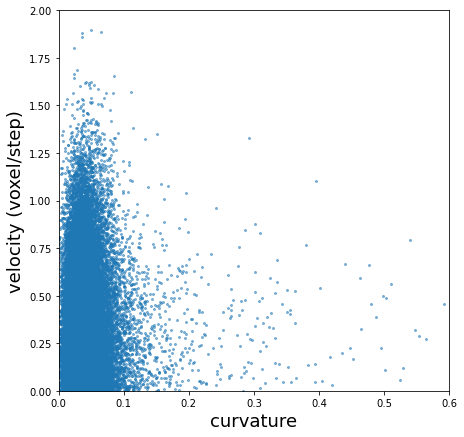

<Figure size 432x288 with 0 Axes>

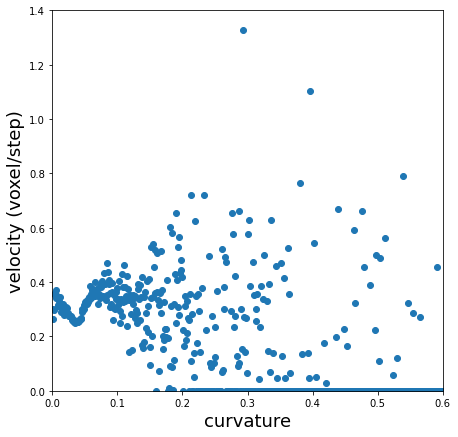

In [19]:
    # All in 1 figrue
    velocity_1Dlist = []
    curvature_1Dlist = []
    curvature_1Dlist_remove_0step = []
    velocity_1Dlist_remove_0step = []
    for i in range(len(GB_list_velocity_list)): 
        velocity_1Dlist.extend(GB_list_velocity_list[i])
        curvature_1Dlist.extend(GB_list_curvature_list[i])
        if i > 0: 
            curvature_1Dlist_remove_0step.extend(GB_list_curvature_list[i])
            velocity_1Dlist_remove_0step.extend(GB_list_velocity_list[i])
    figure_name_all = f"figures/3D_velocity_curvature_{case_name}_5d.png"
    plt.figure()
    fig = plt.figure(figsize=(7, 7))
    plt.scatter(curvature_1Dlist_remove_0step, velocity_1Dlist_remove_0step,s=4,alpha=0.5)
    plt.xlabel("curvature", fontsize=18)
    plt.ylabel("velocity (voxel/step)", fontsize=18)
    plt.xlim([0,0.6])
    plt.ylim([0,2.0])
    plt.savefig(figure_name_all, dpi=400,bbox_inches='tight')
    
    # plot velocity VS averaged curvature
    bin_interval = 0.001
    bin_number = int(0.6/bin_interval)
    curvature_coordinate = np.arange(0,0.6,bin_interval)+bin_interval/2

    curvature_bin = np.zeros(bin_number)
    velocity_bin = np.zeros(bin_number)
    for index in range(len(curvature_1Dlist_remove_0step)):
        if curvature_1Dlist_remove_0step[index]>0.6: continue
        curvature_bin[int(curvature_1Dlist_remove_0step[index]//bin_interval)] += 1
        velocity_bin[int(curvature_1Dlist_remove_0step[index]//bin_interval)] += velocity_1Dlist_remove_0step[index]
    for i in range(bin_number): 
        if curvature_bin[i]>0: velocity_bin[i] = velocity_bin[i]/curvature_bin[i]
    # plot
    figure_name_all_bin = f"figures/3D_velocity_curvature_{case_name}_5d_afterBin.png"
    plt.figure()
    fig = plt.figure(figsize=(7, 7))
    # plt.scatter(curvature_coordinate, velocity_bin,s=4,alpha=0.5)
    plt.plot(curvature_coordinate, velocity_bin,'o', linewidth=2)
    plt.xlabel("curvature", fontsize=18)
    plt.ylabel("velocity (voxel/step)", fontsize=18)
    plt.xlim([0,0.6])
    plt.ylim([0,1.4])
    plt.savefig(figure_name_all_bin, dpi=400,bbox_inches='tight')


In [23]:
    # Plot relationship for each time steps
    for time_step in range(len(GB_list_velocity_list)):
        figure_name = f"figures/3D_velocity_curvature_step{time_step}.png"
        plt.figure()
        fig = plt.figure(figsize=(7, 7))
        plt.scatter(GB_list_curvature_list[time_step], GB_list_velocity_list[time_step],s=4,alpha=0.5)
        plt.xlabel("curvature", fontsize=18)
        plt.ylabel("velocity (voxel/step)", fontsize=18)
        plt.xlim([0,0.6])
        plt.ylim([0,2])
        plt.savefig(figure_name, dpi=400,bbox_inches='tight')

## 2D case

In [2]:
if __name__ == '__main__':
    # File name
    data_file_folder = "/blue/michael.tonks/lin.yang/VECTOR_data/"
    npy_file_folder = "/blue/michael.tonks/lin.yang/SPPARKS-VirtualIncEnergy/2d_poly_fully/results/"
    # npy_file_folder = "/blue/michael.tonks/lin.yang/SPPARKS-VirtualIncEnergy/2d_poly_wellEnergy/results/"
    case_name = "20k_fully"
    npy_file_name_aniso = f"p_aveE_fz_fully5d_20k_J1_f1.0_t1.0_refer_1_0_0_seed56689_kt0.66.npy"
    # npy_file_name_aniso = f"p_aveE_20000_Cos_delta0.0_J1_refer_1_0_0_seed56689_kt0.66.npy"
    
    # Initial data
    npy_file_aniso = np.load(npy_file_folder + npy_file_name_aniso)
    npy_file_aniso = npy_file_aniso.astype(int)
    print(f"The {case_name} data size is: {npy_file_aniso.shape}")
    print("READING DATA DONE")
    step_num, size_x, size_y, size_z = npy_file_aniso.shape

The 20k_fully data size is: (201, 2400, 2400, 1)
READING DATA DONE


In [40]:
    step_num=121
    grain_nums = 20000
    GB_infomation_dict_list = []
    curvature_matrix_list = []
    for time_step in tqdm(range(step_num)):
        data_file_name = f"GB_velocity_data_nonsign_curvature/2D_curvature_velocity_data_MI_{case_name}_step{time_step}.npz"
        data_curvature_file_name = f"GB_velocity_data_nonsign_curvature/2D_matrix_curvature_data_MI_{case_name}_step{time_step}.npz"
        if os.path.exists(data_file_folder + data_file_name):
            npz_file = np.load(data_file_folder + data_file_name,allow_pickle=True)
            GB_infomation_dict = npz_file["GB_infomation_dict"]
            GB_infomation_dict_list.append(GB_infomation_dict.item())
        else:
            current_microstructure = npy_file_aniso[time_step]
            # get curvature
            if os.path.exists(data_file_folder + data_curvature_file_name):
                npz_file_curvature = np.load(data_file_folder + data_curvature_file_name)
                curvature_matrix = npz_file_curvature["curvature_matrix"]
                curvature_matrix_list.append(curvature_matrix)
            else:
                cores = 128
                loop_times = 5
                R = np.zeros((size_x,size_y,3))
                smoothing_class = linear2d.linear_class(size_x,size_y,grain_nums,cores,loop_times,current_microstructure[:,:,0],R,verification_system = False)
                smoothing_class.linear_main("curvature")
                C_ln = smoothing_class.get_C()
                curvature_matrix = C_ln[1,:]
                curvature_matrix_list.append(curvature_matrix)
                # save curvature information
                # np.savez(data_file_folder + data_curvature_file_name, curvature_matrix=curvature_matrix)
            print("Finish curvature calculation")
            
            # Get TJ and QJ information first
            TJ_infomation_dict = dict()
            for index, result in np.ndenumerate(current_microstructure):
                i,j,k = index
                ip,im,jp,jm = myInput.periodic_bc(size_x,size_y,i,j)
                if ( ((current_microstructure[ip,j,k]-current_microstructure[i,j,k])!=0) or ((current_microstructure[im,j,k]-current_microstructure[i,j,k])!=0) or\
                     ((current_microstructure[i,jp,k]-current_microstructure[i,j,k])!=0) or ((current_microstructure[i,jm,k]-current_microstructure[i,j,k])!=0) ):
                    central_site = int(current_microstructure[i,j,k])
                    neighboring_sites_list = np.array([current_microstructure[ip,j,k], current_microstructure[i,jp,k], current_microstructure[im,j,k], current_microstructure[i,jm,k]]).astype(int)
                    neighboring_sites_set = set(neighboring_sites_list) # Get all unique neighboring sites
                    if central_site in neighboring_sites_set: neighboring_sites_set.remove(central_site) # remove central site
                    neighboring_sites_list_unque = list(neighboring_sites_set)
                    # remove the TJs and QJs
                    if len(neighboring_sites_list_unque) > 1: 
                        for m in range(len(neighboring_sites_list_unque)):
                            pair_id = post_processing.get_line(central_site, neighboring_sites_list_unque[m]) # get pair id
                            if pair_id in TJ_infomation_dict:
                                tmp = TJ_infomation_dict[pair_id]
                                tmp.append([i,j,k])
                                TJ_infomation_dict[pair_id] = tmp
                            else: 
                                TJ_infomation_dict[pair_id] = [[i,j,k]]
            print("Finish TJ extraction")
            
            # Get the center of each GB
            GB_infomation_dict = dict()
            TJ_distance_max = 6 # voxels
            for index, result in np.ndenumerate(current_microstructure):
                i,j,k = index
                ip,im,jp,jm = myInput.periodic_bc(size_x,size_y,i,j)
                if ( ((current_microstructure[ip,j,k]-current_microstructure[i,j,k])!=0) or ((current_microstructure[im,j,k]-current_microstructure[i,j,k])!=0) or\
                     ((current_microstructure[i,jp,k]-current_microstructure[i,j,k])!=0) or ((current_microstructure[i,jm,k]-current_microstructure[i,j,k])!=0) ):
                    central_site = int(current_microstructure[i,j,k])
                    neighboring_sites_list = np.array([current_microstructure[ip,j,k], current_microstructure[i,jp,k], current_microstructure[im,j,k], current_microstructure[i,jm,k]]).astype(int)
                    neighboring_sites_set = set(neighboring_sites_list) # Get all unique neighboring sites
                    if central_site in neighboring_sites_set: neighboring_sites_set.remove(central_site) # remove central site
                    neighboring_sites_list_unque = list(neighboring_sites_set)
                    # remove the TJs and QJs
                    if len(neighboring_sites_list_unque) > 1: continue # only remove TJs and QJs
                    # CONTINUE...    # remove the voxels around TJs and QJs
                    # check the GB voxels is close to TJ or not
                    break_point = 0
                    pair_id = post_processing.get_line(central_site, neighboring_sites_list_unque[0]) # get pair id
                    if central_site<neighboring_sites_list_unque[0]: pair_id_pair = [central_site, neighboring_sites_list_unque[0]]
                    else: pair_id_pair = [neighboring_sites_list_unque[0], central_site]
                    if pair_id in GB_infomation_dict:
                        GB_infomation_dict[pair_id][5] += 1 # GB area
                    else:
                        GB_infomation = np.array([0,0,0,0,0.0,1,pair_id_pair[0],pair_id_pair[1]]) # GBnum-curvature,i,j,k,curvature,GBnum,gid0,gid1
                        GB_infomation_dict[pair_id] = GB_infomation
                    if pair_id in TJ_infomation_dict:
                        for TJ_site in TJ_infomation_dict[pair_id]:
                            TJ_distance = np.linalg.norm(index-np.array(TJ_site))
                            if TJ_distance < TJ_distance_max: 
                                break_point = 1
                                break
                    if break_point == 1: continue
                    # calculate or extract misorientation
                    # if pair_id in GB_infomation_dict:
                    GB_infomation_dict[pair_id][0] += 1
                    GB_infomation_dict[pair_id][1:5] += np.array([i,j,k,curvature_matrix[i,j]])
                    
            # get the correct location for each GB
            small_GB_list = []
            for key in GB_infomation_dict: 
                if GB_infomation_dict[key][0] == 0: 
                    small_GB_list.append(key) # remove the small GB with 0 voxels after remove voxels close to TJs
            for s_index in range(len(small_GB_list)): GB_infomation_dict.pop(small_GB_list[s_index])
            for key in GB_infomation_dict: 
                GB_infomation_dict[key][1:5]=GB_infomation_dict[key][1:5]/GB_infomation_dict[key][0]
            print(f"Current GBs len at {time_step} steps: {len(GB_infomation_dict)}")
            # save information
            np.savez(data_file_folder + data_file_name, GB_infomation_dict=GB_infomation_dict)
            GB_infomation_dict_list.append(GB_infomation_dict)

  2%|▏         | 2/121 [00:16<00:07, 16.74it/s]

Finish curvature calculation
Finish TJ extraction


  2%|▏         | 3/121 [02:45<2:15:44, 69.02s/it]

Current GBs len at 2 steps: 16156
Finish curvature calculation
Finish TJ extraction


  3%|▎         | 4/121 [05:24<3:20:14, 102.69s/it]

Current GBs len at 3 steps: 13834
Finish curvature calculation
Finish TJ extraction


  4%|▍         | 5/121 [08:01<3:54:45, 121.42s/it]

Current GBs len at 4 steps: 11980
Finish curvature calculation
Finish TJ extraction


  5%|▍         | 6/121 [10:35<4:13:25, 132.22s/it]

Current GBs len at 5 steps: 10494
Finish curvature calculation
Finish TJ extraction


  6%|▌         | 7/121 [13:10<4:25:03, 139.50s/it]

Current GBs len at 6 steps: 9305
Finish curvature calculation
Finish TJ extraction


  7%|▋         | 8/121 [15:40<4:29:05, 142.88s/it]

Current GBs len at 7 steps: 8450
Finish curvature calculation
Finish TJ extraction


  7%|▋         | 9/121 [18:08<4:29:21, 144.30s/it]

Current GBs len at 8 steps: 7701
Finish curvature calculation
Finish TJ extraction


  8%|▊         | 10/121 [20:36<4:29:25, 145.64s/it]

Current GBs len at 9 steps: 7107
Finish curvature calculation
Finish TJ extraction


  9%|▉         | 11/121 [23:04<4:28:03, 146.22s/it]

Current GBs len at 10 steps: 6606
Finish curvature calculation
Finish TJ extraction


 10%|▉         | 12/121 [25:30<4:25:42, 146.26s/it]

Current GBs len at 11 steps: 6184
Finish curvature calculation
Finish TJ extraction


 11%|█         | 13/121 [27:57<4:23:36, 146.45s/it]

Current GBs len at 12 steps: 5777
Finish curvature calculation
Finish TJ extraction


 12%|█▏        | 14/121 [30:23<4:21:08, 146.43s/it]

Current GBs len at 13 steps: 5411
Finish curvature calculation
Finish TJ extraction


 12%|█▏        | 15/121 [32:50<4:18:48, 146.50s/it]

Current GBs len at 14 steps: 5112
Finish curvature calculation
Finish TJ extraction


 13%|█▎        | 16/121 [35:18<4:17:20, 147.05s/it]

Current GBs len at 15 steps: 4791


 14%|█▍        | 17/121 [37:44<4:14:25, 146.78s/it]

Current GBs len at 16 steps: 4564
Finish curvature calculation
Finish TJ extraction


 15%|█▍        | 18/121 [40:08<4:10:31, 145.93s/it]

Current GBs len at 17 steps: 4385
Finish curvature calculation
Finish TJ extraction


 16%|█▌        | 19/121 [42:32<4:07:04, 145.34s/it]

Current GBs len at 18 steps: 4154
Finish curvature calculation
Finish TJ extraction


 17%|█▋        | 20/121 [44:55<4:03:26, 144.62s/it]

Current GBs len at 19 steps: 3960
Finish curvature calculation
Finish TJ extraction


 17%|█▋        | 21/121 [47:17<3:59:29, 143.70s/it]

Current GBs len at 20 steps: 3813
Finish curvature calculation
Finish TJ extraction


 18%|█▊        | 22/121 [49:41<3:57:09, 143.73s/it]

Current GBs len at 21 steps: 3648
Finish curvature calculation
Finish TJ extraction


 19%|█▉        | 23/121 [52:04<3:54:30, 143.58s/it]

Current GBs len at 22 steps: 3511
Finish curvature calculation
Finish TJ extraction


 20%|█▉        | 24/121 [54:28<3:52:28, 143.80s/it]

Current GBs len at 23 steps: 3377
Finish curvature calculation
Finish TJ extraction


 21%|██        | 25/121 [56:53<3:50:19, 143.96s/it]

Current GBs len at 24 steps: 3281
Finish curvature calculation
Finish TJ extraction


 21%|██▏       | 26/121 [59:15<3:47:09, 143.47s/it]

Current GBs len at 25 steps: 3164
Finish curvature calculation
Finish TJ extraction


 22%|██▏       | 27/121 [1:01:40<3:45:44, 144.09s/it]

Current GBs len at 26 steps: 3067
Finish curvature calculation
Finish TJ extraction


 23%|██▎       | 28/121 [1:04:05<3:43:39, 144.30s/it]

Current GBs len at 27 steps: 2930
Finish curvature calculation
Finish TJ extraction


 24%|██▍       | 29/121 [1:06:27<3:40:01, 143.49s/it]

Current GBs len at 28 steps: 2840
Finish curvature calculation
Finish TJ extraction


 25%|██▍       | 30/121 [1:08:50<3:37:35, 143.47s/it]

Current GBs len at 29 steps: 2744
Finish curvature calculation
Finish TJ extraction


 26%|██▌       | 31/121 [1:11:15<3:35:44, 143.83s/it]

Current GBs len at 30 steps: 2675
Finish curvature calculation
Finish TJ extraction


 26%|██▋       | 32/121 [1:13:38<3:33:13, 143.75s/it]

Current GBs len at 31 steps: 2579
Finish curvature calculation
Finish TJ extraction


 27%|██▋       | 33/121 [1:16:02<3:30:41, 143.66s/it]

Current GBs len at 32 steps: 2511
Finish curvature calculation
Finish TJ extraction


 28%|██▊       | 34/121 [1:18:28<3:29:13, 144.29s/it]

Current GBs len at 33 steps: 2441
Finish curvature calculation
Finish TJ extraction


 29%|██▉       | 35/121 [1:20:53<3:27:12, 144.56s/it]

Current GBs len at 34 steps: 2378
Finish curvature calculation
Finish TJ extraction


 30%|██▉       | 36/121 [1:23:16<3:24:06, 144.08s/it]

Current GBs len at 35 steps: 2344
Finish curvature calculation
Finish TJ extraction


 31%|███       | 37/121 [1:25:40<3:21:42, 144.07s/it]

Current GBs len at 36 steps: 2320
Finish curvature calculation
Finish TJ extraction


 31%|███▏      | 38/121 [1:28:03<3:18:50, 143.74s/it]

Current GBs len at 37 steps: 2254
Finish curvature calculation
Finish TJ extraction


 32%|███▏      | 39/121 [1:30:30<3:17:57, 144.84s/it]

Current GBs len at 38 steps: 2193
Finish curvature calculation
Finish TJ extraction


 33%|███▎      | 40/121 [1:32:58<3:16:35, 145.62s/it]

Current GBs len at 39 steps: 2151
Finish curvature calculation
Finish TJ extraction


 34%|███▍      | 41/121 [1:35:27<3:15:26, 146.58s/it]

Current GBs len at 40 steps: 2075
Finish curvature calculation
Finish TJ extraction


 35%|███▍      | 42/121 [1:37:56<3:13:58, 147.32s/it]

Current GBs len at 41 steps: 2032
Finish curvature calculation
Finish TJ extraction


 36%|███▌      | 43/121 [1:40:22<3:11:17, 147.15s/it]

Current GBs len at 42 steps: 1983
Finish curvature calculation
Finish TJ extraction


 36%|███▋      | 44/121 [1:42:49<3:08:31, 146.91s/it]

Current GBs len at 43 steps: 1928
Finish curvature calculation
Finish TJ extraction


 37%|███▋      | 45/121 [1:45:16<3:06:05, 146.92s/it]

Current GBs len at 44 steps: 1908
Finish curvature calculation
Finish TJ extraction


 38%|███▊      | 46/121 [1:47:44<3:04:13, 147.38s/it]

Current GBs len at 45 steps: 1883
Finish curvature calculation
Finish TJ extraction


 39%|███▉      | 47/121 [1:50:13<3:02:09, 147.70s/it]

Current GBs len at 46 steps: 1852
Finish curvature calculation
Finish TJ extraction


 40%|███▉      | 48/121 [1:52:40<2:59:45, 147.75s/it]

Current GBs len at 47 steps: 1813
Finish curvature calculation
Finish TJ extraction


 40%|████      | 49/121 [1:55:08<2:57:25, 147.86s/it]

Current GBs len at 48 steps: 1768
Finish curvature calculation
Finish TJ extraction


 41%|████▏     | 50/121 [1:57:35<2:54:25, 147.40s/it]

Current GBs len at 49 steps: 1737
Finish curvature calculation
Finish TJ extraction


 42%|████▏     | 51/121 [2:00:01<2:51:30, 147.01s/it]

Current GBs len at 50 steps: 1700
Finish curvature calculation
Finish TJ extraction


 43%|████▎     | 52/121 [2:02:29<2:49:28, 147.37s/it]

Current GBs len at 51 steps: 1672
Finish curvature calculation
Finish TJ extraction


 44%|████▍     | 53/121 [2:04:57<2:47:18, 147.63s/it]

Current GBs len at 52 steps: 1653
Finish curvature calculation
Finish TJ extraction


 45%|████▍     | 54/121 [2:07:25<2:44:52, 147.64s/it]

Current GBs len at 53 steps: 1629
Finish curvature calculation
Finish TJ extraction


 45%|████▌     | 55/121 [2:09:53<2:42:26, 147.68s/it]

Current GBs len at 54 steps: 1595
Finish curvature calculation
Finish TJ extraction


 46%|████▋     | 56/121 [2:12:24<2:41:14, 148.84s/it]

Current GBs len at 55 steps: 1566
Finish curvature calculation
Finish TJ extraction


 47%|████▋     | 57/121 [2:14:52<2:38:19, 148.44s/it]

Current GBs len at 56 steps: 1542
Finish curvature calculation
Finish TJ extraction


 48%|████▊     | 58/121 [2:17:19<2:35:19, 147.92s/it]

Current GBs len at 57 steps: 1512
Finish curvature calculation
Finish TJ extraction


 49%|████▉     | 59/121 [2:19:49<2:33:36, 148.65s/it]

Current GBs len at 58 steps: 1495
Finish curvature calculation
Finish TJ extraction


 50%|████▉     | 60/121 [2:22:18<2:31:22, 148.90s/it]

Current GBs len at 59 steps: 1480
Finish curvature calculation
Finish TJ extraction


 50%|█████     | 61/121 [2:24:48<2:29:06, 149.11s/it]

Current GBs len at 60 steps: 1447
Finish curvature calculation
Finish TJ extraction
Current GBs len at 61 steps: 1429


 51%|█████     | 62/121 [2:27:20<2:27:21, 149.86s/it]

Finish curvature calculation
Finish TJ extraction


 52%|█████▏    | 63/121 [2:29:49<2:24:46, 149.76s/it]

Current GBs len at 62 steps: 1396
Finish curvature calculation
Finish TJ extraction


 53%|█████▎    | 64/121 [2:32:19<2:22:17, 149.78s/it]

Current GBs len at 63 steps: 1381
Finish curvature calculation
Finish TJ extraction


 54%|█████▎    | 65/121 [2:34:49<2:19:48, 149.79s/it]

Current GBs len at 64 steps: 1367
Finish curvature calculation
Finish TJ extraction


 55%|█████▍    | 66/121 [2:37:21<2:17:55, 150.47s/it]

Current GBs len at 65 steps: 1356
Finish curvature calculation
Finish TJ extraction


 55%|█████▌    | 67/121 [2:39:53<2:15:50, 150.94s/it]

Current GBs len at 66 steps: 1333
Finish curvature calculation
Finish TJ extraction


 56%|█████▌    | 68/121 [2:42:24<2:13:29, 151.13s/it]

Current GBs len at 67 steps: 1318
Finish curvature calculation
Finish TJ extraction


 57%|█████▋    | 69/121 [2:44:56<2:11:09, 151.33s/it]

Current GBs len at 68 steps: 1300
Finish curvature calculation
Finish TJ extraction


 58%|█████▊    | 70/121 [2:47:28<2:08:45, 151.49s/it]

Current GBs len at 69 steps: 1269
Finish curvature calculation
Finish TJ extraction


 59%|█████▊    | 71/121 [2:50:00<2:06:16, 151.54s/it]

Current GBs len at 70 steps: 1251
Finish curvature calculation
Finish TJ extraction


 60%|█████▉    | 72/121 [2:52:30<2:03:22, 151.08s/it]

Current GBs len at 71 steps: 1247
Finish curvature calculation
Finish TJ extraction


 60%|██████    | 73/121 [2:55:01<2:01:00, 151.26s/it]

Current GBs len at 72 steps: 1221
Finish curvature calculation
Finish TJ extraction


 61%|██████    | 74/121 [2:57:32<1:58:23, 151.13s/it]

Current GBs len at 73 steps: 1205
Finish curvature calculation
Finish TJ extraction


 62%|██████▏   | 75/121 [3:00:02<1:55:29, 150.64s/it]

Current GBs len at 74 steps: 1187
Finish curvature calculation
Finish TJ extraction


 63%|██████▎   | 76/121 [3:02:34<1:53:24, 151.20s/it]

Current GBs len at 75 steps: 1161
Finish curvature calculation
Finish TJ extraction


 64%|██████▎   | 77/121 [3:05:08<1:51:28, 152.01s/it]

Current GBs len at 76 steps: 1137
Finish curvature calculation
Finish TJ extraction


 64%|██████▍   | 78/121 [3:07:43<1:49:37, 152.96s/it]

Current GBs len at 77 steps: 1114
Finish curvature calculation
Finish TJ extraction


 65%|██████▌   | 79/121 [3:10:18<1:47:26, 153.49s/it]

Current GBs len at 78 steps: 1097
Finish curvature calculation
Finish TJ extraction


 66%|██████▌   | 80/121 [3:12:54<1:45:20, 154.16s/it]

Current GBs len at 79 steps: 1084
Finish curvature calculation
Finish TJ extraction


 67%|██████▋   | 81/121 [3:15:29<1:42:56, 154.42s/it]

Current GBs len at 80 steps: 1079
Finish curvature calculation
Finish TJ extraction


 68%|██████▊   | 82/121 [3:18:02<1:40:09, 154.08s/it]

Current GBs len at 81 steps: 1062
Finish curvature calculation
Finish TJ extraction


 69%|██████▊   | 83/121 [3:20:35<1:37:21, 153.72s/it]

Current GBs len at 82 steps: 1054
Finish curvature calculation
Finish TJ extraction


 69%|██████▉   | 84/121 [3:23:11<1:35:14, 154.44s/it]

Current GBs len at 83 steps: 1032
Finish curvature calculation
Finish TJ extraction


 70%|███████   | 85/121 [3:25:46<1:32:40, 154.45s/it]

Current GBs len at 84 steps: 1028
Finish curvature calculation
Finish TJ extraction


 71%|███████   | 86/121 [3:28:21<1:30:11, 154.63s/it]

Current GBs len at 85 steps: 1020
Finish curvature calculation
Finish TJ extraction


 72%|███████▏  | 87/121 [3:30:56<1:27:46, 154.89s/it]

Current GBs len at 86 steps: 1009
Finish curvature calculation
Finish TJ extraction


 73%|███████▎  | 88/121 [3:33:31<1:25:09, 154.83s/it]

Current GBs len at 87 steps: 995
Finish curvature calculation
Finish TJ extraction


 74%|███████▎  | 89/121 [3:36:08<1:22:57, 155.55s/it]

Current GBs len at 88 steps: 986
Finish curvature calculation
Finish TJ extraction


 74%|███████▍  | 90/121 [3:38:46<1:20:46, 156.35s/it]

Current GBs len at 89 steps: 980
Finish curvature calculation
Finish TJ extraction


 75%|███████▌  | 91/121 [3:41:25<1:18:29, 156.99s/it]

Current GBs len at 90 steps: 969
Finish curvature calculation
Finish TJ extraction


 76%|███████▌  | 92/121 [3:44:03<1:16:01, 157.29s/it]

Current GBs len at 91 steps: 966
Finish curvature calculation
Finish TJ extraction


 77%|███████▋  | 93/121 [3:46:42<1:13:43, 157.96s/it]

Current GBs len at 92 steps: 950
Finish curvature calculation
Finish TJ extraction


 78%|███████▊  | 94/121 [3:49:22<1:11:15, 158.36s/it]

Current GBs len at 93 steps: 934
Finish curvature calculation
Finish TJ extraction


 79%|███████▊  | 95/121 [3:52:03<1:09:02, 159.32s/it]

Current GBs len at 94 steps: 933
Finish curvature calculation
Finish TJ extraction


 79%|███████▉  | 96/121 [3:54:44<1:06:34, 159.77s/it]

Current GBs len at 95 steps: 919
Finish curvature calculation
Finish TJ extraction


 80%|████████  | 97/121 [3:57:23<1:03:50, 159.60s/it]

Current GBs len at 96 steps: 895
Finish curvature calculation
Finish TJ extraction


 81%|████████  | 98/121 [4:00:03<1:01:12, 159.69s/it]

Current GBs len at 97 steps: 898
Finish curvature calculation
Finish TJ extraction


 82%|████████▏ | 99/121 [4:02:44<58:43, 160.15s/it]  

Current GBs len at 98 steps: 879
Finish curvature calculation
Finish TJ extraction


 83%|████████▎ | 100/121 [4:05:25<56:05, 160.25s/it]

Current GBs len at 99 steps: 874
Finish curvature calculation
Finish TJ extraction


 83%|████████▎ | 101/121 [4:08:06<53:30, 160.53s/it]

Current GBs len at 100 steps: 869
Finish curvature calculation
Finish TJ extraction


 84%|████████▍ | 102/121 [4:10:48<51:01, 161.12s/it]

Current GBs len at 101 steps: 855
Finish curvature calculation
Finish TJ extraction


 85%|████████▌ | 103/121 [4:13:27<48:07, 160.40s/it]

Current GBs len at 102 steps: 843
Finish curvature calculation
Finish TJ extraction


 86%|████████▌ | 104/121 [4:16:06<45:19, 159.95s/it]

Current GBs len at 103 steps: 835
Finish curvature calculation
Finish TJ extraction


 87%|████████▋ | 105/121 [4:18:45<42:34, 159.67s/it]

Current GBs len at 104 steps: 837
Finish curvature calculation
Finish TJ extraction


 88%|████████▊ | 106/121 [4:21:28<40:08, 160.58s/it]

Current GBs len at 105 steps: 829
Finish curvature calculation
Finish TJ extraction


 88%|████████▊ | 107/121 [4:24:10<37:33, 161.00s/it]

Current GBs len at 106 steps: 817
Finish curvature calculation
Finish TJ extraction


 89%|████████▉ | 108/121 [4:26:52<34:56, 161.27s/it]

Current GBs len at 107 steps: 815
Finish curvature calculation
Finish TJ extraction


 90%|█████████ | 109/121 [4:29:32<32:12, 161.01s/it]

Current GBs len at 108 steps: 815
Finish curvature calculation
Finish TJ extraction


 91%|█████████ | 110/121 [4:32:12<29:27, 160.70s/it]

Current GBs len at 109 steps: 806
Finish curvature calculation
Finish TJ extraction


 92%|█████████▏| 111/121 [4:34:53<26:47, 160.73s/it]

Current GBs len at 110 steps: 798
Finish curvature calculation
Finish TJ extraction


 93%|█████████▎| 112/121 [4:37:35<24:09, 161.06s/it]

Current GBs len at 111 steps: 793
Finish curvature calculation
Finish TJ extraction


 93%|█████████▎| 113/121 [4:40:16<21:29, 161.23s/it]

Current GBs len at 112 steps: 783
Finish curvature calculation
Finish TJ extraction


 94%|█████████▍| 114/121 [4:42:56<18:45, 160.73s/it]

Current GBs len at 113 steps: 781
Finish curvature calculation
Finish TJ extraction


 95%|█████████▌| 115/121 [4:45:36<16:03, 160.66s/it]

Current GBs len at 114 steps: 780
Finish curvature calculation
Finish TJ extraction


 96%|█████████▌| 116/121 [4:48:19<13:26, 161.23s/it]

Current GBs len at 115 steps: 769
Finish curvature calculation
Finish TJ extraction


 97%|█████████▋| 117/121 [4:51:00<10:44, 161.17s/it]

Current GBs len at 116 steps: 762
Finish curvature calculation
Finish TJ extraction


 98%|█████████▊| 118/121 [4:53:42<08:04, 161.54s/it]

Current GBs len at 117 steps: 760
Finish curvature calculation
Finish TJ extraction


 98%|█████████▊| 119/121 [4:56:26<05:24, 162.14s/it]

Current GBs len at 118 steps: 744
Finish curvature calculation
Finish TJ extraction


 99%|█████████▉| 120/121 [4:59:06<02:41, 161.61s/it]

Current GBs len at 119 steps: 735
Finish curvature calculation
Finish TJ extraction


100%|██████████| 121/121 [5:01:49<00:00, 149.67s/it]

Current GBs len at 120 steps: 736


In [41]:
    time_interval = 2
    GB_list_velocity = np.zeros((step_num,int(grain_nums*(grain_nums+1)/2)))
    GB_list_velocity_list = []
    GB_list_curvature_list = []
    for time_step in range(step_num):
        if time_step+1 >= step_num: continue
        GB_list_velocity_list_tmp = []
        GB_list_curvature_list_tmp = []
        for key in tqdm(GB_infomation_dict_list[time_step]):
            if GB_infomation_dict_list[time_step+1].get(key) is None: continue
            # Calculate velocity
            pair_id_pair = GB_infomation_dict_list[time_step][key][6:8]
            growth_direction1 = (npy_file_aniso[time_step]==pair_id_pair[0])*(npy_file_aniso[time_step+1]==pair_id_pair[1])
            growth_direction2 = (npy_file_aniso[time_step]==pair_id_pair[1])*(npy_file_aniso[time_step+1]==pair_id_pair[0])
            dV = abs(np.sum(growth_direction1)-np.sum(growth_direction2))
            
            # location_difference = GB_infomation_dict_list[time_step+1][key][1:4] - GB_infomation_dict_list[time_step][key][1:4]
            # location_length = np.linalg.norm(location_difference)
            velocity = dV/time_interval/(GB_infomation_dict_list[time_step][key][5]/2)
            GB_list_velocity_list_tmp.append(velocity)
            GB_list_curvature_list_tmp.append(GB_infomation_dict_list[time_step][key][4])
            # GB_list_velocity[time_step, key] = velocity
            
        GB_list_velocity_list.append(GB_list_velocity_list_tmp)
        GB_list_curvature_list.append(GB_list_curvature_list_tmp)
            

 91%|█████████▏| 6032/6606 [02:36<00:16, 33.98it/s]IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

 39%|███▉      | 1228/3164 [00:34<00:47, 40.86it/s]IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

100%|██████████| 735/735 [00:22<00:00, 33.10it/s]


<Figure size 432x288 with 0 Axes>

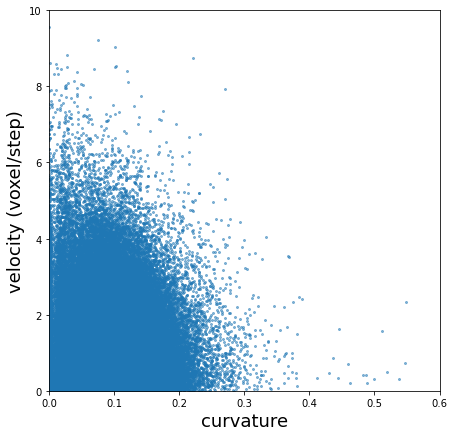

<Figure size 432x288 with 0 Axes>

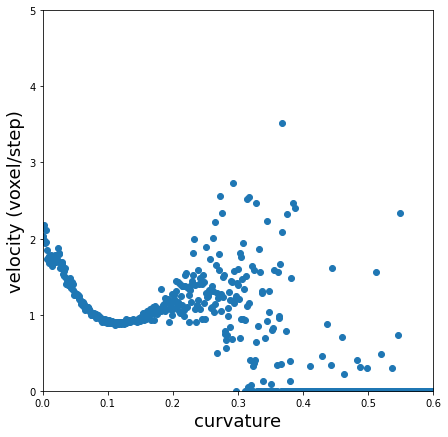

In [42]:
    # All in 1 figrue
    curvature_1Dlist_remove_0step = []
    velocity_1Dlist_remove_0step = []
    for i in range(0,len(GB_list_velocity_list)): 
        curvature_1Dlist_remove_0step.extend(GB_list_curvature_list[i])
        velocity_1Dlist_remove_0step.extend(GB_list_velocity_list[i])
    figure_name_all = f"figures/2D_velocity_curvature_MI_{case_name}_5d.png"
    plt.figure()
    fig = plt.figure(figsize=(7, 7))
    plt.scatter(curvature_1Dlist_remove_0step, velocity_1Dlist_remove_0step,s=4,alpha=0.5)
    plt.xlabel("curvature", fontsize=18)
    plt.ylabel("velocity (voxel/step)", fontsize=18)
    plt.xlim([0,0.6])
    plt.ylim([0,10])
    # plt.xlim([0,0.1])
    # plt.ylim([0,20])
    plt.savefig(figure_name_all, dpi=400,bbox_inches='tight')
    
    # plot velocity VS averaged curvature
    bin_interval = 0.001
    bin_number = int(0.6/bin_interval)
    curvature_coordinate = np.arange(0,0.6,bin_interval)+bin_interval/2

    curvature_bin = np.zeros(bin_number)
    velocity_bin = np.zeros(bin_number)
    for index in range(len(curvature_1Dlist_remove_0step)):
        if curvature_1Dlist_remove_0step[index]>0.6: continue
        curvature_bin[int(curvature_1Dlist_remove_0step[index]//bin_interval)] += 1
        velocity_bin[int(curvature_1Dlist_remove_0step[index]//bin_interval)] += velocity_1Dlist_remove_0step[index]
    for i in range(bin_number): 
        if curvature_bin[i]>0: velocity_bin[i] = velocity_bin[i]/curvature_bin[i]
    # plot
    figure_name_all_bin = f"figures/2D_velocity_curvature_MI_{case_name}_5d_afterBin.png"
    plt.figure()
    fig = plt.figure(figsize=(7, 7))
    # plt.scatter(curvature_coordinate, velocity_bin,s=4,alpha=0.5)
    plt.plot(curvature_coordinate, velocity_bin,'o', linewidth=2)
    plt.xlabel("curvature", fontsize=18)
    plt.ylabel("velocity (voxel/step)", fontsize=18)
    plt.xlim([0,0.6])
    plt.ylim([0,5])
    plt.savefig(figure_name_all_bin, dpi=400,bbox_inches='tight')


/scratch/local/27622295/ipykernel_9229/2644375604.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 432x288 with 0 Axes>

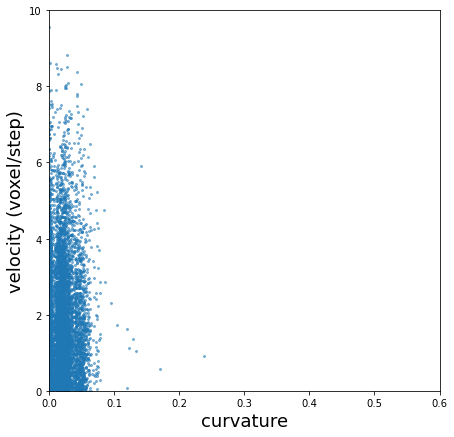

<Figure size 432x288 with 0 Axes>

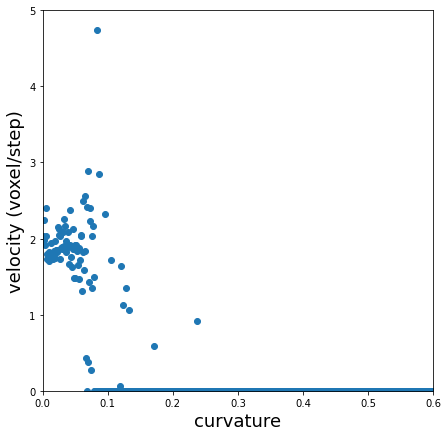

<Figure size 432x288 with 0 Axes>

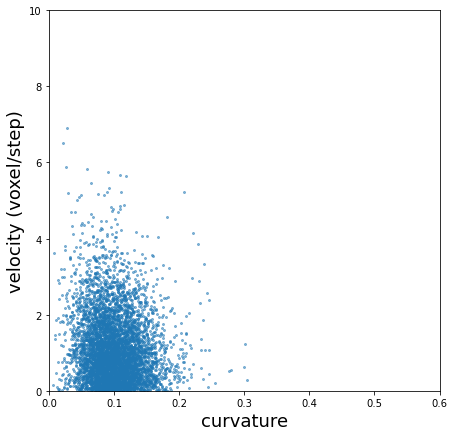

<Figure size 432x288 with 0 Axes>

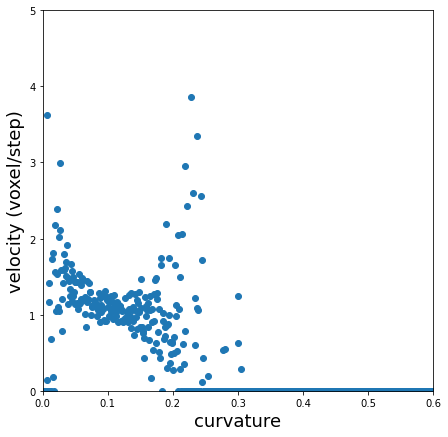

<Figure size 432x288 with 0 Axes>

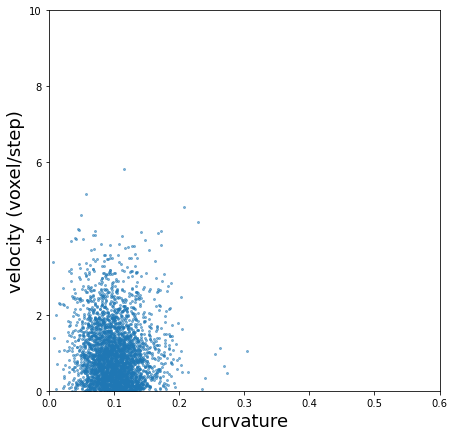

<Figure size 432x288 with 0 Axes>

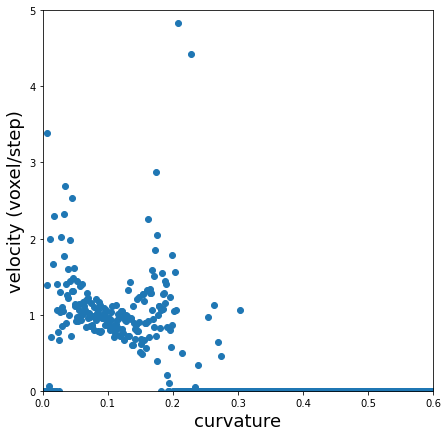

<Figure size 432x288 with 0 Axes>

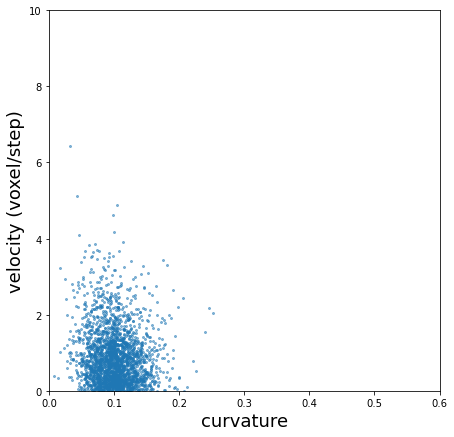

<Figure size 432x288 with 0 Axes>

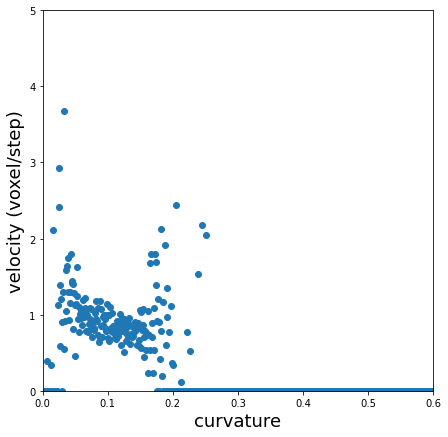

<Figure size 432x288 with 0 Axes>

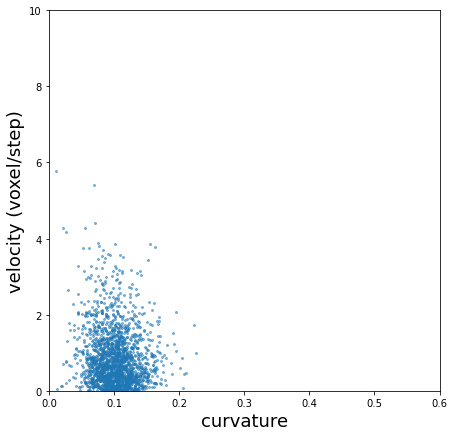

<Figure size 432x288 with 0 Axes>

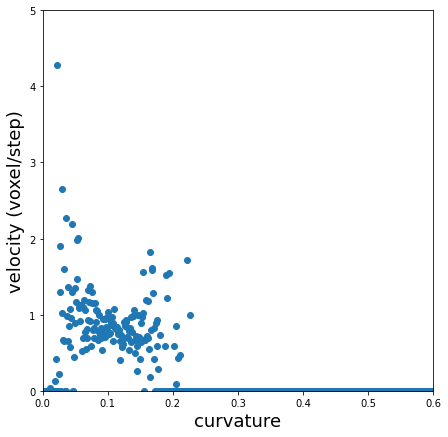

<Figure size 432x288 with 0 Axes>

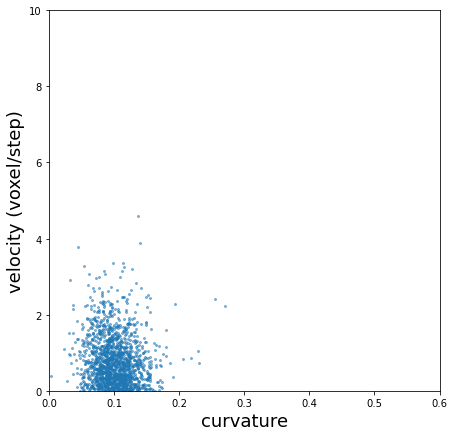

<Figure size 432x288 with 0 Axes>

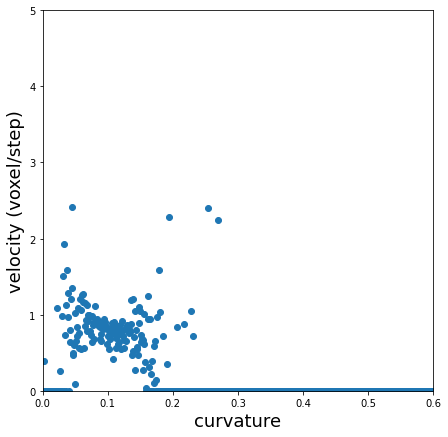

<Figure size 432x288 with 0 Axes>

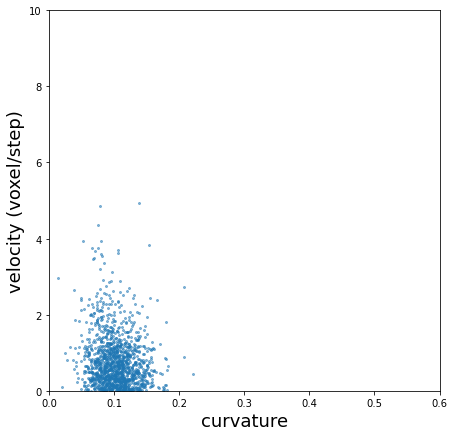

<Figure size 432x288 with 0 Axes>

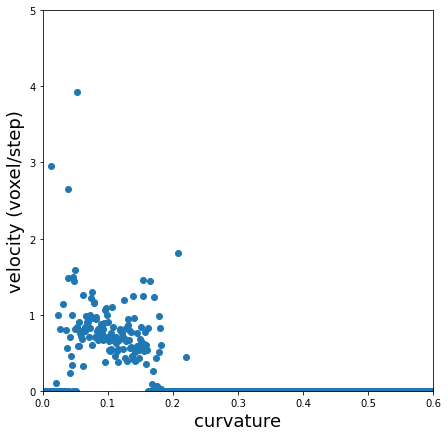

<Figure size 432x288 with 0 Axes>

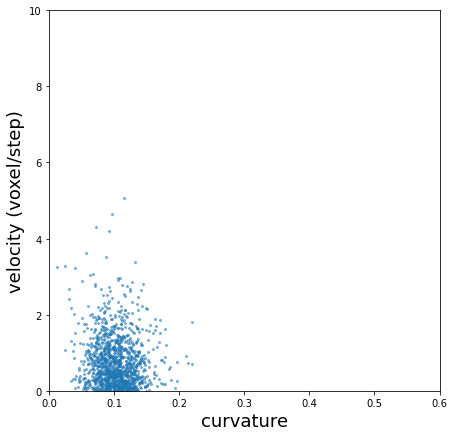

<Figure size 432x288 with 0 Axes>

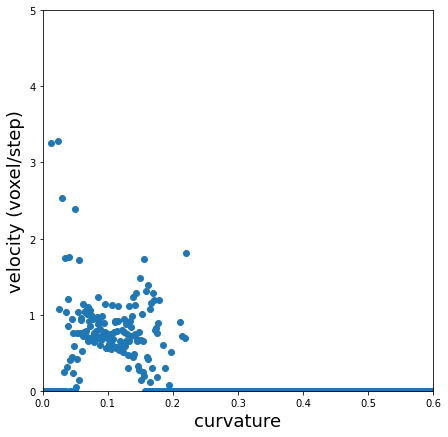

<Figure size 432x288 with 0 Axes>

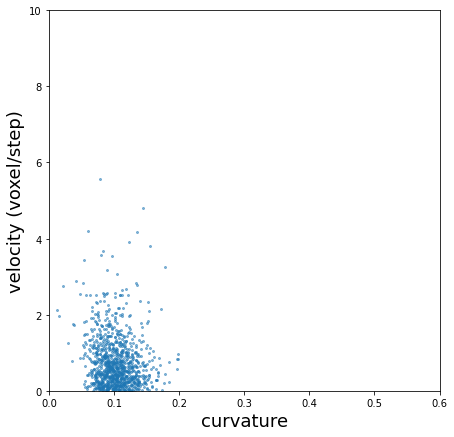

<Figure size 432x288 with 0 Axes>

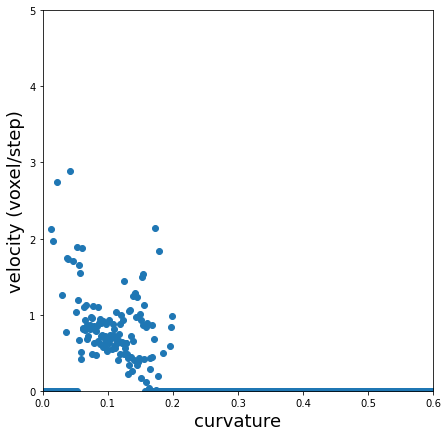

<Figure size 432x288 with 0 Axes>

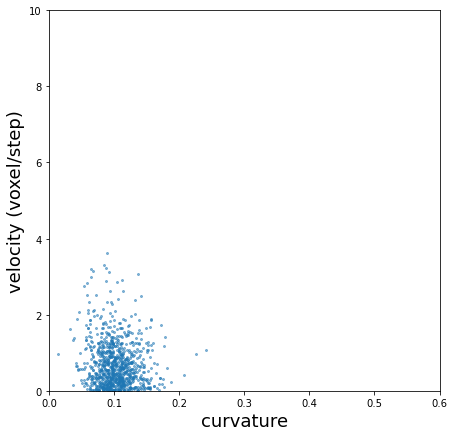

<Figure size 432x288 with 0 Axes>

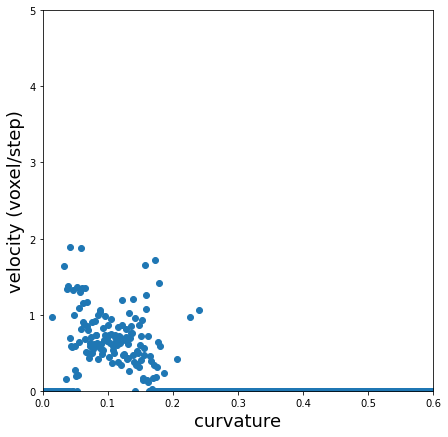

<Figure size 432x288 with 0 Axes>

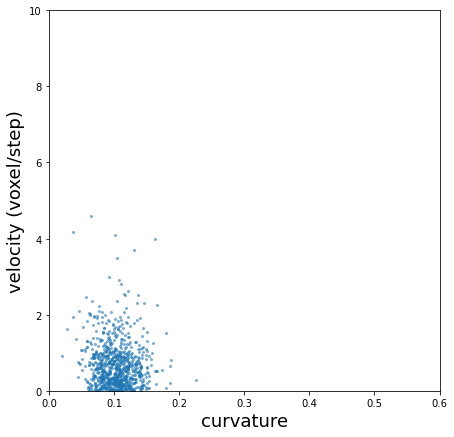

<Figure size 432x288 with 0 Axes>

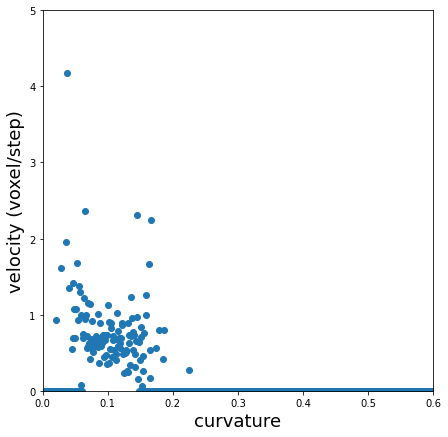

<Figure size 432x288 with 0 Axes>

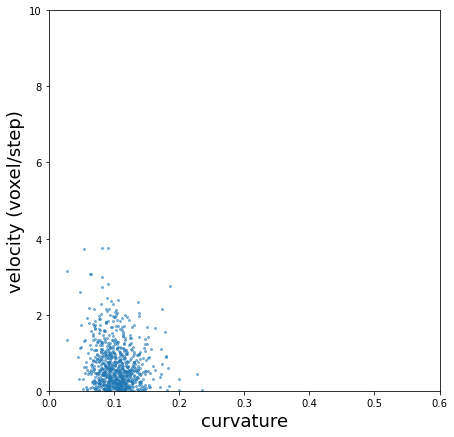

<Figure size 432x288 with 0 Axes>

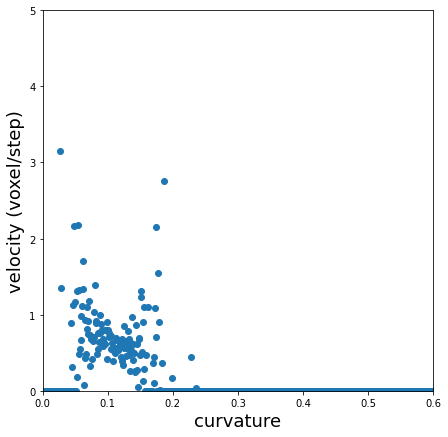

In [43]:
    # Plot relationship for each time steps
    for time_step in range(0,len(GB_list_velocity_list),10):
        figure_name = f"figures/2D_velocity_curvature_MI_step{time_step}_{case_name}.png"
        plt.figure()
        fig = plt.figure(figsize=(7, 7))
        plt.scatter(GB_list_curvature_list[time_step], GB_list_velocity_list[time_step],s=4,alpha=0.5)
        plt.xlabel("curvature", fontsize=18)
        plt.ylabel("velocity (voxel/step)", fontsize=18)
        plt.xlim([0,0.6])
        plt.ylim([0,10])
        plt.savefig(figure_name, dpi=400,bbox_inches='tight')
        
        # plot velocity VS averaged curvature
        bin_interval = 0.001
        bin_number = int(0.6/bin_interval)
        curvature_coordinate = np.arange(0,0.6,bin_interval)+bin_interval/2

        curvature_bin = np.zeros(bin_number)
        velocity_bin = np.zeros(bin_number)
        for index in range(len(GB_list_curvature_list[time_step])):
            if GB_list_curvature_list[time_step][index]>0.6: continue
            curvature_bin[int(GB_list_curvature_list[time_step][index]//bin_interval)] += 1
            velocity_bin[int(GB_list_curvature_list[time_step][index]//bin_interval)] += GB_list_velocity_list[time_step][index]
        for i in range(bin_number): 
            if curvature_bin[i]>0: velocity_bin[i] = velocity_bin[i]/curvature_bin[i]
        # plot
        figure_name_all_bin = f"figures/2D_velocity_curvature_MI_step{time_step}_{case_name}_afterBin.png"
        plt.figure()
        fig = plt.figure(figsize=(7, 7))
        # plt.scatter(curvature_coordinate, velocity_bin,s=4,alpha=0.5)
        plt.plot(curvature_coordinate, velocity_bin,'o', linewidth=2)
        plt.xlabel("curvature", fontsize=18)
        plt.ylabel("velocity (voxel/step)", fontsize=18)
        plt.xlim([0,0.6])
        plt.ylim([0,5])
        plt.savefig(figure_name_all_bin, dpi=400,bbox_inches='tight')

## Plot curvature matrix

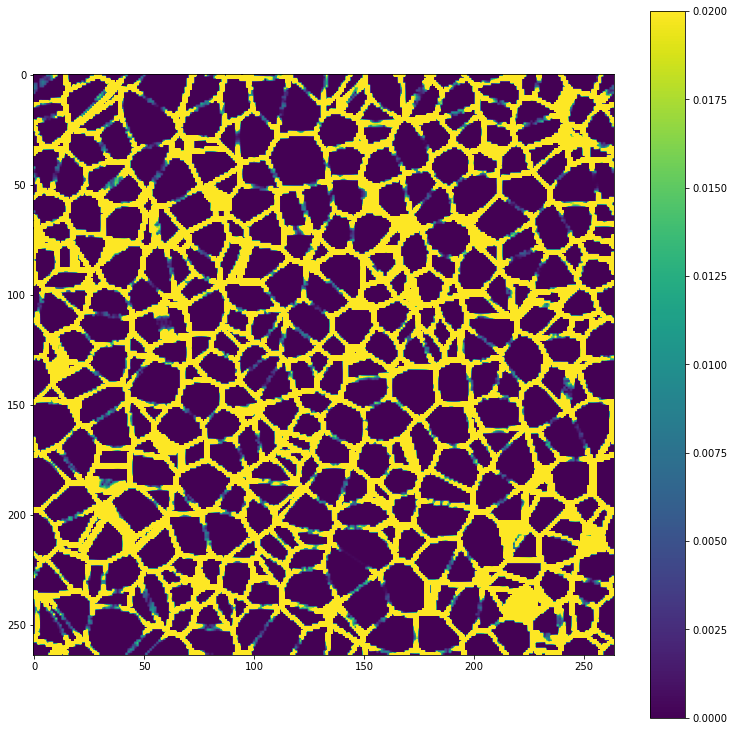

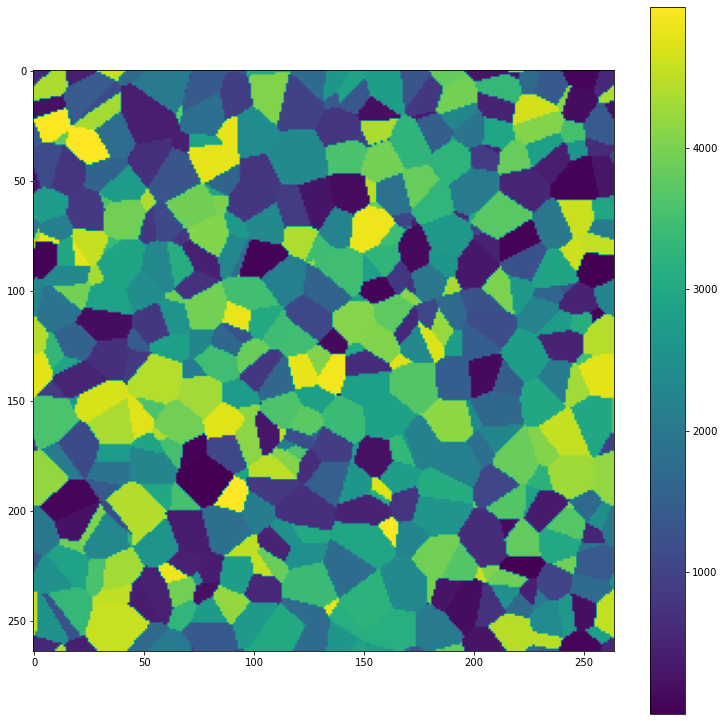

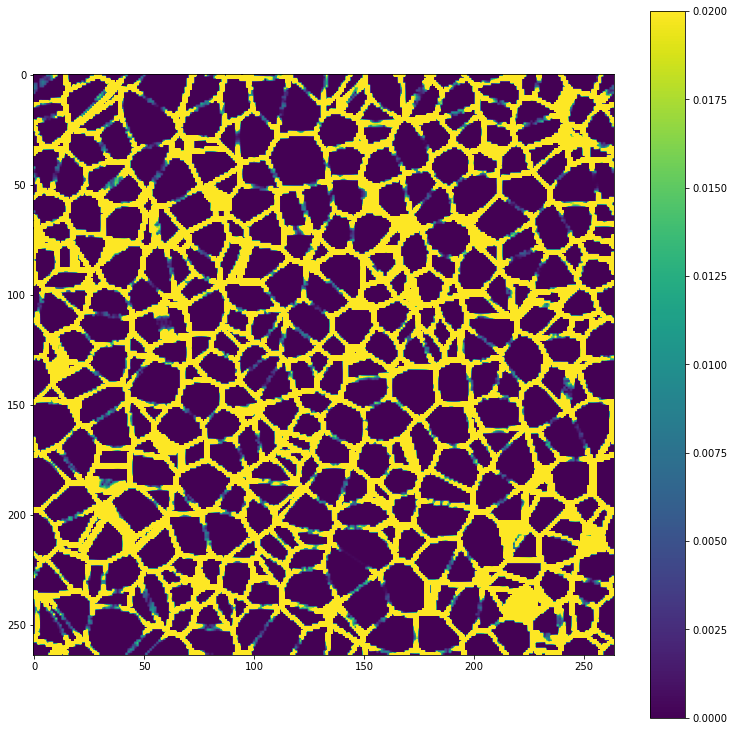

In [146]:
data_curvature_file_name = f"GB_velocity_data/matrix_curvature_data_{case_name}_step0.npz"
test_curvature_matrix_list = np.load(data_file_folder + data_curvature_file_name)["curvature_matrix"]

plt.figure(figsize=(13,13))
plt.imshow(test_curvature_matrix_list[100],vmin=0,vmax=0.02)
plt.colorbar()

plt.figure(figsize=(13,13))
plt.imshow(npy_file_aniso[0][100])
plt.colorbar()

cores = 128
loop_times = 5
R = np.zeros((size_x,size_y,size_z,4))
smoothing_class = Linear_3D.linear3d_class(size_x,size_y,size_z,grain_nums,cores,loop_times,npy_file_aniso[0],R,'p')
smoothing_class.linear3d_main("curvature")
C_ln = smoothing_class.get_C()
curvature_matrix = C_ln[1,:]

plt.figure(figsize=(13,13))
plt.imshow(curvature_matrix[100],vmin=0,vmax=0.02)
plt.colorbar()